<a href="https://colab.research.google.com/github/OscarG-DataSci/ADS-599B/blob/main/ELPAC_DataPreprocessing%26Modeling(EO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/elpac.csv')

In [3]:
df.head()

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,...,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity
0,2017-2018,0,3,1,7/4/11,6.828340,F,Hispanic,N,Y,...,4,180,175,0.972222,1.0,1.999999,1.972222,F,4,Hispanic
1,2017-2018,1,5,4,7/28/08,9.631957,M,Hispanic,N,N,...,3,180,168,0.933333,1.0,4.999999,4.933333,F,2,Multiple
2,2017-2018,3,3,4,5/6/08,9.905748,M,Hispanic,Y,N,...,2,180,175,0.972222,1.0,4.999999,4.972222,F,18,White
3,2017-2018,4,3,0,4/13/12,6.108271,M,Hispanic,N,N,...,4,180,125,0.694444,1.0,0.999999,0.694444,F,1,White
4,2017-2018,5,7,0,9/25/11,6.664066,M,Hispanic,N,N,...,1,180,165,0.916667,1.0,0.999999,0.916667,F,17,Hispanic


In [4]:
print(df.shape, df.dtypes)

(11669, 24) AcademicYear                   object
Stu_deID                        int64
School_deID                     int64
GradeLevel                      int64
DOB                            object
TestAge                       float64
StudentGender                  object
StudentEthnicity               object
Special_Education              object
Homeless                       object
SocioEconomically              object
TestDayName                    object
TestDate                       object
OverallScore                    int64
OverallLevel                    int64
ExpectedAttendanceDays          int64
DaysAttended                    int64
AttendedPct                   float64
EnrolledPct                   float64
GradeEnrolledPct              float64
GradeAttendedPct              float64
TeacherGender                  object
TeacherTotalYearsOfService      int64
TeacherEthnicity               object
dtype: object


In [5]:
print(df.columns)

Index(['AcademicYear', 'Stu_deID', 'School_deID', 'GradeLevel', 'DOB',
       'TestAge', 'StudentGender', 'StudentEthnicity', 'Special_Education',
       'Homeless', 'SocioEconomically', 'TestDayName', 'TestDate',
       'OverallScore', 'OverallLevel', 'ExpectedAttendanceDays',
       'DaysAttended', 'AttendedPct', 'EnrolledPct', 'GradeEnrolledPct',
       'GradeAttendedPct', 'TeacherGender', 'TeacherTotalYearsOfService',
       'TeacherEthnicity'],
      dtype='object')


#####**CHECK DUPLICATED RECORDS**

In [6]:
print(df.duplicated().sum())

0


#####**DISTRIBUTIONS OF EACH COLUMN**

In [7]:
print(df.value_counts())

AcademicYear  Stu_deID  School_deID  GradeLevel  DOB       TestAge    StudentGender  StudentEthnicity  Special_Education  Homeless  SocioEconomically  TestDayName  TestDate  OverallScore  OverallLevel  ExpectedAttendanceDays  DaysAttended  AttendedPct  EnrolledPct  GradeEnrolledPct  GradeAttendedPct  TeacherGender  TeacherTotalYearsOfService  TeacherEthnicity
2017-2018     0         3            1           7/4/11    6.828340   F              Hispanic          N                  Y         Y                  Wednesday    5/2/18    1503          4             180                     175           0.972222     1.000000     1.999999          1.972222          F              4                           Hispanic            1
2020-2021     998       0            5           11/8/09   11.433500  M              Hispanic          N                  N         Y                  Thursday     4/15/21   1498          2             180                     172           0.955556     1.000000     5.999

#####**ADD STUDENT'S AGE COLUMN CONVERTING FROM DOB**

In [8]:
from datetime import date

def calculate_age(born):
    today = date.today()
    try: 
        birthday = born.replace(year=today.year)
    except ValueError: # raised when birth date is February 29 and the current year is not a leap year
        birthday = born.replace(month=born.month+1, day=1, year=today.year)
    if birthday > today:
        return today.year - born.year - 1
    else:
        return today.year - born.year

In [9]:
#change DOB into year-month-date format and save under 'format_DOB'
df['format_DOB'] =  pd.to_datetime(df['DOB'], format='%m/%d/%y')

In [10]:
#apply on DOB column
df['age'] = df['format_DOB'].apply(calculate_age)

In [11]:
df.head(5)

,AcademicYear,Stu_deID,School_deID,GradeLevel,DOB,TestAge,StudentGender,StudentEthnicity,Special_Education,Homeless,...,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,format_DOB,age
0,2017-2018,0,3,1,7/4/11,6.828340,F,Hispanic,N,Y,...,175,0.972222,1.0,1.999999,1.972222,F,4,Hispanic,2011-07-04,11
1,2017-2018,1,5,4,7/28/08,9.631957,M,Hispanic,N,N,...,168,0.933333,1.0,4.999999,4.933333,F,2,Multiple,2008-07-28,14
2,2017-2018,3,3,4,5/6/08,9.905748,M,Hispanic,Y,N,...,175,0.972222,1.0,4.999999,4.972222,F,18,White,2008-05-06,14
3,2017-2018,4,3,0,4/13/12,6.108271,M,Hispanic,N,N,...,125,0.694444,1.0,0.999999,0.694444,F,1,White,2012-04-13,10
4,2017-2018,5,7,0,9/25/11,6.664066,M,Hispanic,N,N,...,165,0.916667,1.0,0.999999,0.916667,F,17,Hispanic,2011-09-25,11


##**DATA VISUALIZATION**

####**DISTRIBUTION PLOTS OF CATEGORICAL VARIABLES**

In [12]:
#Split numerical and categorical dataframes for visualization purpose

#for num_df, only extract the useful columns and drop the columns such as 'Stu_deID'

num_df = df[['School_deID','GradeLevel','TestAge','OverallScore','OverallLevel','ExpectedAttendanceDays','DaysAttended',
           'AttendedPct', 'EnrolledPct' ,'GradeEnrolledPct', 'GradeAttendedPct','TeacherTotalYearsOfService','format_DOB','age']]

#for cat_df, keep only the suitable features for visualization 
cat_df = df[['AcademicYear','StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically','TestDayName',
           'TeacherGender','TeacherEthnicity']]

In [13]:
num_df.head()

,School_deID,GradeLevel,TestAge,OverallScore,OverallLevel,ExpectedAttendanceDays,DaysAttended,AttendedPct,EnrolledPct,GradeEnrolledPct,GradeAttendedPct,TeacherTotalYearsOfService,format_DOB,age
0,3,1,6.828340,1503,4,180,175,0.972222,1.0,1.999999,1.972222,4,2011-07-04,11
1,5,4,9.631957,1535,3,180,168,0.933333,1.0,4.999999,4.933333,2,2008-07-28,14
2,3,4,9.905748,1480,2,180,175,0.972222,1.0,4.999999,4.972222,18,2008-05-06,14
3,3,0,6.108271,1461,4,180,125,0.694444,1.0,0.999999,0.694444,1,2012-04-13,10
4,7,0,6.664066,1357,1,180,165,0.916667,1.0,0.999999,0.916667,17,2011-09-25,11


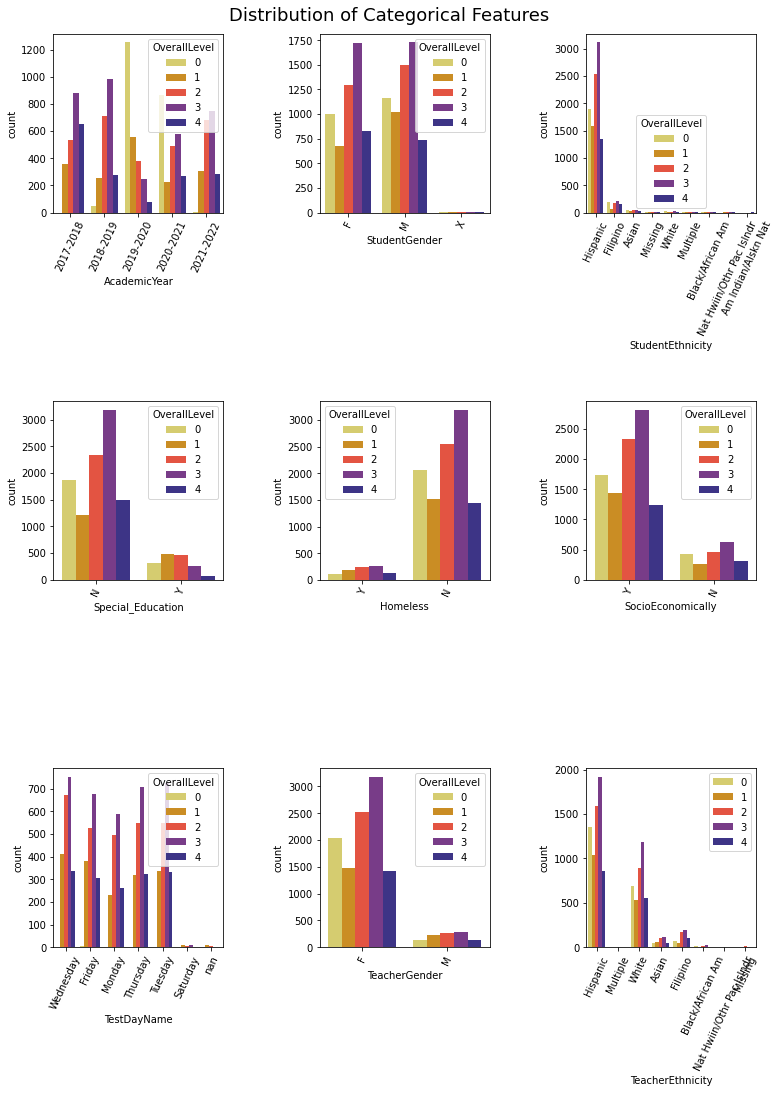

In [14]:

fig , ax = plt.subplots(3,3, figsize = (12,16))     # set up 2 x 2 frame count plot with figsize 10 x 10
fig.suptitle("Distribution of Categorical Features", fontsize=18)

for i , subplots in zip (cat_df, ax.flatten()):
  g = sns.countplot(cat_df[i],hue = df['OverallLevel'],ax = subplots, palette = 'CMRmap_r')
  g.set_xticklabels(labels=cat_df[i].unique(), rotation= 65)


fig.tight_layout(pad= 5.0)
plt.legend(loc = 'upper right')
plt.show()

####**From the categorical distribution plots, it's noted that**

1.  Similar counts between academic_year, student's gender (except X unique value). 

2.  Less counts of students with required special education, homeless, non-socioeconomically. 

3.  Majority of students are Hispanic. 

4.  Majority of test days are from Monday through Friday.  

5.  Most teachers are females.  Most teachers are Hispanic. 

6.  Unique value X in 'StudentGender', Nan in 'TestDayName', Missing  in 'TeacherEthnicity'. 
All of the values will be replaced with the mode of each feature column in Missing Value Imputation Section.

####**DISTRIBUTION PLOTS OF NUMERICAL VARIABLES**

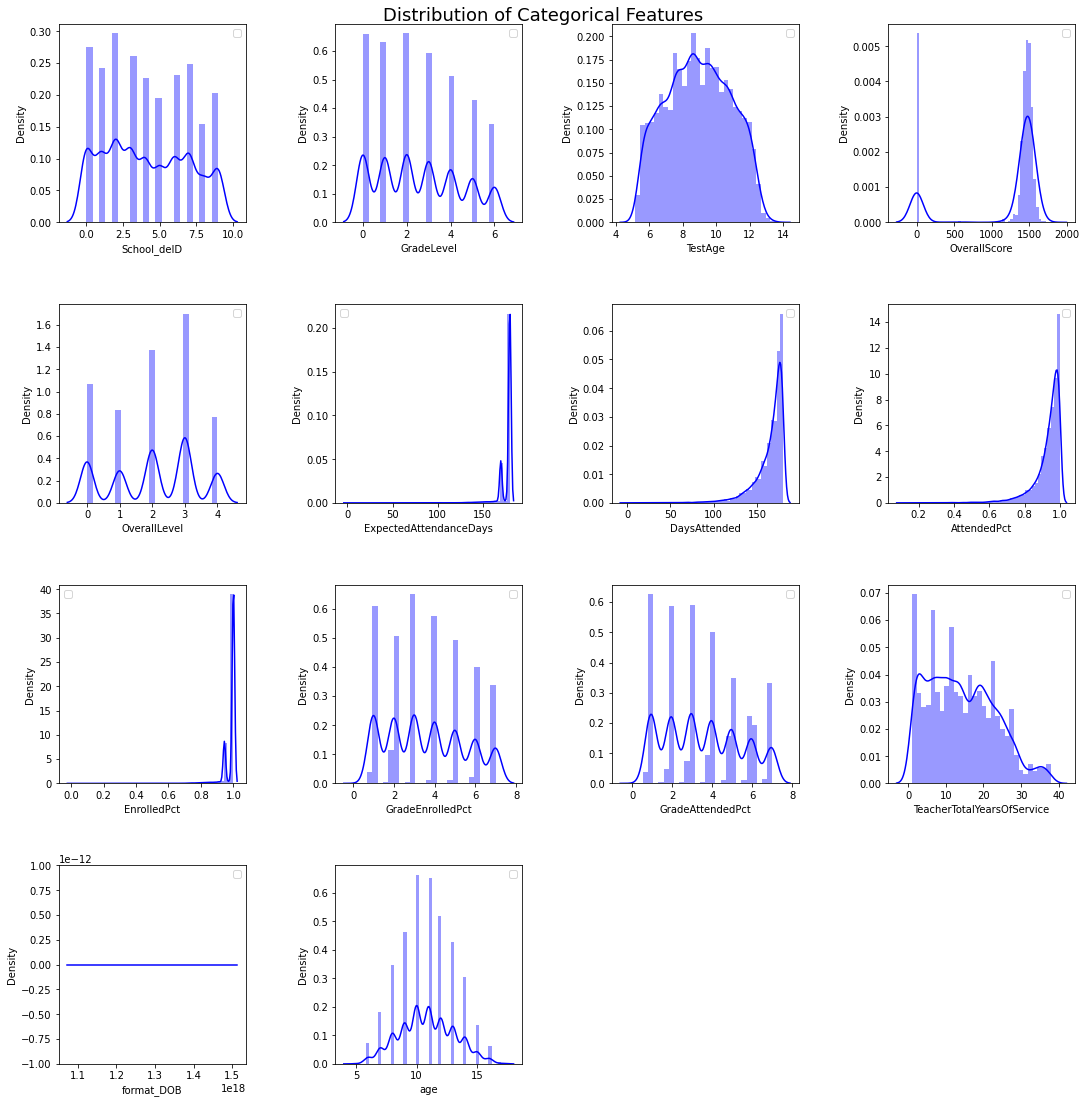

In [15]:
fig , ax = plt.subplots(3,3, figsize = (16,16))     
fig.suptitle("Distribution of Categorical Features", fontsize=18)

for i, column in enumerate(num_df, 1):
    plt.subplot(4, 4, i)
    sns.distplot(x=num_df[column], color = 'blue') 
    plt.legend() 
    plt.xlabel(column)
    fig.tight_layout(pad=4.0)

####**From the numerical histograms, it's noted that**

1. Normal distributions are observed for TestAge and age

2.  OverallScore, ExpectedAttendanceDays, DaysAttended, AttendedPct, EnrolledPct are left skewed meaning most student's attendance are higher. 

3.  TeacherTotalYearsofService are slighly right skewed meaning junior level teachers outweigh the experienced senior teachers.   

3.  Zero values in 'OverallScore'. 



####**CORRELATION PLOT**

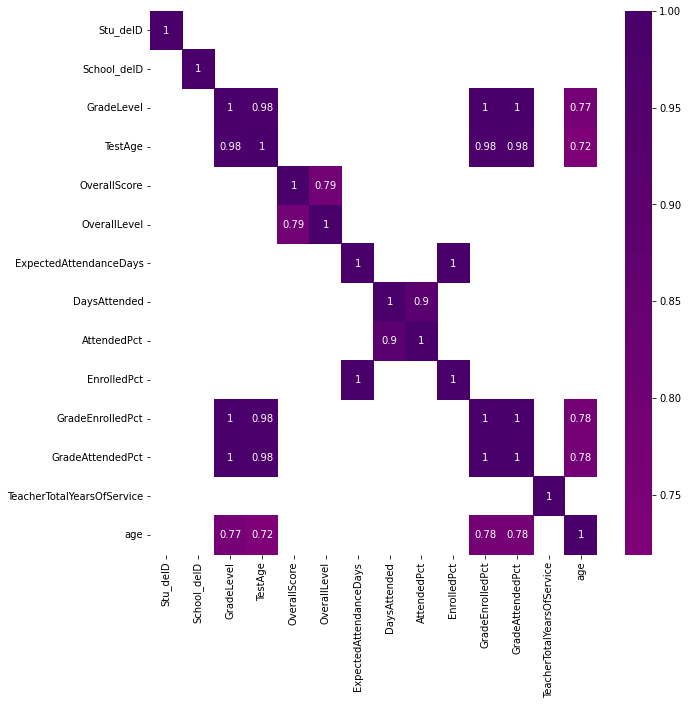

In [16]:
corr = df.corr()
kot = corr[corr>=.7]  #filter correlation pairs higher than 0.9
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(kot, annot=True, cmap="RdPu", center=0, ax=ax)

####**Highly correlated features are**



1.   GradeLevel & TestAge
2.   OverallScore & OverallLevel
3.   GradeEnrolledPct & GradeAttendedPct
4.   DaysAttended & AttendedPct





###**DISTRIBUTION OF TARGET CLASSES: OVERALLLEVEL**

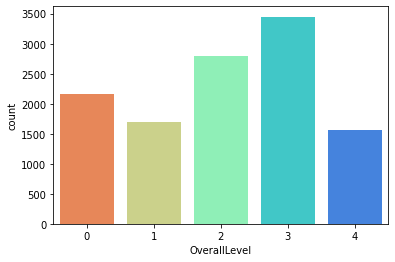

In [17]:
fig_szie=(12,8)
sns.countplot(df['OverallLevel'], data = df, palette = 'rainbow_r')

###A slight class-imbalance was observed amaong the scores.  

1.  Downsampling will be performed for level 2 and 3 as reference to level 4 count. 

2. Balanced dataset will be trained with models to see the accuracy performance. 

In [18]:
#downsamples level 2 and 3 as reference to level 4

lev_0 = df[df['OverallLevel'] == 0]
lev_1 = df[df['OverallLevel'] == 1]
lev_2 = df[df['OverallLevel'] == 2]
lev_3 = df[df['OverallLevel'] == 3]
lev_4 = df[df['OverallLevel'] == 4]


In [19]:
from sklearn.utils import resample

lev0_upsample = resample(lev_0,replace=True,n_samples=len(lev_3),random_state=42)
lev1_upsample = resample(lev_1,replace=True,n_samples=len(lev_3),random_state=42)
lev2_upsample = resample(lev_2,replace=True,n_samples=len(lev_3),random_state=42)
lev4_upsample = resample(lev_4,replace=True,n_samples=len(lev_3),random_state=42)


In [20]:
#create a new dataframe with balanced datasets

frames = (lev0_upsample, lev1_upsample, lev2_upsample, lev_3, lev4_upsample)
df1 = pd.concat(frames)
df1.shape

(17245, 26)

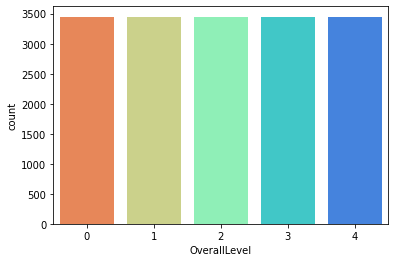

In [21]:
fig_szie=(12,8)
sns.countplot(df1['OverallLevel'], data = df1, palette = 'rainbow_r')

###**MISSING VALUES**

In [22]:
df1.isna().sum()

AcademicYear                     0
Stu_deID                         0
School_deID                      0
GradeLevel                       0
DOB                              0
TestAge                       3433
StudentGender                    0
StudentEthnicity                 0
Special_Education                0
Homeless                         0
SocioEconomically                0
TestDayName                   3433
TestDate                      3433
OverallScore                     0
OverallLevel                     0
ExpectedAttendanceDays           0
DaysAttended                     0
AttendedPct                      2
EnrolledPct                      0
GradeEnrolledPct                 0
GradeAttendedPct                 2
TeacherGender                    0
TeacherTotalYearsOfService       0
TeacherEthnicity                 0
format_DOB                       0
age                              0
dtype: int64

####**CHECK MISSING VALUES IMPUTATION**

There are 2159 missing values in columns of TestAge, TestDayName, TestDate. Since the number of missing values (2159) are the same, they seem to related to each other.  Let's check with the visualization. There's also 3 missing values in GradenAttendedPct. 

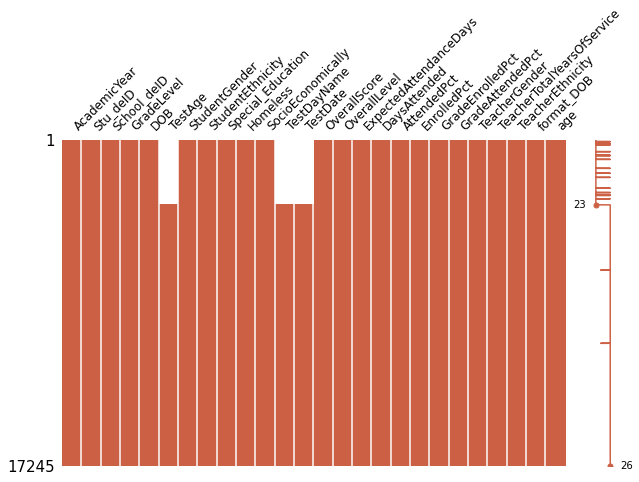

In [23]:
msno.matrix(df1, figsize=(10,6), fontsize=12, color=(.8, 0.38, 0.27))

Missing Not At Random (MNAR) is observed and they seem to related to each other between TestAge, TestDayName, and TestDate. 

###**According to the data visualization plots, here are the steps for feature engineering.**

1.  GradeEnrolledPct, AttendedPct will be dropped from the data frame to avoid multicollinearity. 

2.  TestAge is the student's age on the date of the ELPAC test. For example, for record #1, the student was born on 7/4/2011 and student is 11 year old. TestAge of the student is 6.828340. Since GradeLevel and TestAge are highly correlated and age column was also populated, it's safe to drop the TestAge to avoid multicollinearity.  

3.  OverallScore will also be dropped since it wil be unknown in classifying/predicting the ELPAC scores in the real life application.

4.  Other insignificant columns such as 'AcademicYear', 'Stu_deID', 'DOB', 'format_DOB', 'TestDate' will also be dropped. 

5.  Dataset will be split into Train and test dataset. 

6.  Unique value X in 'StudentGender', Nan in 'TestDayName' will be replaced with the mode of each feature column for each train and test data set to avoid data leakage. 

7.  Label-encoding will be performed for categorical variables. 


In [24]:
new_df = df1.drop(columns = ['AcademicYear','Stu_deID','DOB','TestAge','OverallScore','GradeEnrolledPct',
                             'AttendedPct','format_DOB','TestDate'])

In [25]:
new_df.head()

,School_deID,GradeLevel,StudentGender,StudentEthnicity,Special_Education,Homeless,SocioEconomically,TestDayName,OverallLevel,ExpectedAttendanceDays,DaysAttended,EnrolledPct,GradeAttendedPct,TeacherGender,TeacherTotalYearsOfService,TeacherEthnicity,age
6328,0,6,M,Hispanic,N,N,Y,NaN,0,180,172,1.0,6.955556,F,4,White,14
7203,9,0,M,Hispanic,N,N,N,NaN,0,180,178,1.0,0.988889,F,11,Hispanic,9
6876,4,0,M,Hispanic,N,Y,Y,NaN,0,180,176,1.0,0.977778,F,8,Hispanic,8
6795,8,0,F,Hispanic,N,N,Y,NaN,0,180,166,1.0,0.922222,F,1,White,8
8205,1,0,M,Hispanic,Y,N,Y,NaN,0,180,173,1.0,0.961111,F,19,White,7


###**DATA PARTITIONING**
####**Split dataset into 70% train and 30% test datasets.**

In [26]:
from sklearn.model_selection import train_test_split

Xa = new_df.loc[ : , new_df.columns != 'OverallLevel']
ya = new_df[['OverallLevel']]

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya,random_state=700, test_size=0.30)
print(Xa_train.shape, ya_train.shape, Xa_test.shape, ya_test.shape)

(12071, 16) (12071, 1) (5174, 16) (5174, 1)


In [27]:
##replace X value from StudentGender with Mode value for StudentGender column
print(Xa_train['StudentGender'].mode())
Xa_train['StudentGender'] = Xa_train['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

print(Xa_test['StudentGender'].mode())
Xa_test['StudentGender'] = Xa_test['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

0    M
dtype: object
0    M
dtype: object


In [28]:
#replace missing values from TestDayName column with mode value
Xa_train['TestDayName'] = Xa_train['TestDayName'].fillna(Xa_train['TestDayName'].mode()[0])
Xa_test['TestDayName'] = Xa_test['TestDayName'].fillna(Xa_test['TestDayName'].mode()[0])

In [29]:
#replace missing values from GradeAttendedPact with mean values
Xa_train['GradeAttendedPct'] = Xa_train['GradeAttendedPct'].fillna(Xa_train['GradeAttendedPct'].mean())
Xa_test['GradeAttendedPct'] = Xa_test['GradeAttendedPct'].fillna(Xa_test['GradeAttendedPct'].mean())

####**LABEL-ENCODING FOR CATEGORICAL VARIABLES**

In [30]:
cat_columns = ['StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically',
               'TestDayName','TeacherGender','TeacherEthnicity']

In [31]:
from sklearn.preprocessing import LabelEncoder

#Train dataset
train_label_encoders = {}
for column in cat_columns:
  train_label_encoders[column] = LabelEncoder()
  Xa_train[column] = train_label_encoders[column].fit_transform(Xa_train[column])

#Test dataset
test_label_encoders = {}
for column in cat_columns:
  test_label_encoders[column] = LabelEncoder()
  Xa_test[column] = test_label_encoders[column].fit_transform(Xa_test[column])


###**MODELLING**

####**NAIVES BAYES**

In [32]:
from sklearn.naive_bayes import MultinomialNB
# importing accuracy score
from sklearn.metrics import accuracy_score, classification_report

target_names = ['Level0','Level1','Level2','Level3','Level4']

nb = MultinomialNB().fit(Xa_train, ya_train)

nb_pred = nb.predict(Xa_test)

print(accuracy_score(ya_test, nb_pred))
print(classification_report(ya_test, nb_pred, target_names=target_names))

0.3726323927328952
              precision    recall  f1-score   support

      Level0       0.48      0.81      0.60      1058
      Level1       0.35      0.37      0.36      1053
      Level2       0.27      0.11      0.16       993
      Level3       0.26      0.10      0.14      1020
      Level4       0.32      0.44      0.37      1050

    accuracy                           0.37      5174
   macro avg       0.34      0.37      0.33      5174
weighted avg       0.34      0.37      0.33      5174



####**LOGISTIC REGRESSION**

In [40]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=0,  solver='newton-cg', 
                          multi_class='multinomial').fit(Xa_train, ya_train)

lr_pred = lr_clf.predict(Xa_test)
print(accuracy_score(ya_test, lr_pred))

print(classification_report(ya_test, lr_pred, target_names=target_names))

0.41921144182450715
              precision    recall  f1-score   support

      Level0       0.60      0.91      0.72      1058
      Level1       0.41      0.30      0.35      1053
      Level2       0.34      0.23      0.27       993
      Level3       0.25      0.17      0.20      1020
      Level4       0.34      0.46      0.39      1050

    accuracy                           0.42      5174
   macro avg       0.39      0.42      0.39      5174
weighted avg       0.39      0.42      0.39      5174



#####**FEATURE IMPORTANCE**
Let's see if only using the top 7 feature importances can improve the accuracy of the model.**

In [41]:
lg_importances = pd.DataFrame(data={
    'Attribute': Xa_train.columns,
    'Importance': lr_clf.coef_[0]
})
importances = lg_importances.sort_values(by='Importance', ascending=False)

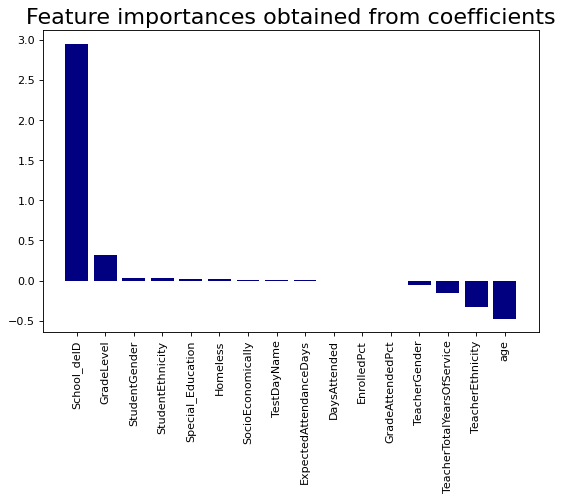

In [42]:
figure(figsize=(8,5), dpi=80)

plt.bar(x=lg_importances['Attribute'], height=importances['Importance'], color='navy')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#subset new dataset with only top 7 positive important features

imp_lg_train = Xa_train[['School_deID','GradeLevel','StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically']]
imp_lg_test = Xa_test[['School_deID','GradeLevel','StudentGender','StudentEthnicity','Special_Education','Homeless','SocioEconomically']]


In [44]:
target_names = ['Level0','Level1','Level2','Level3','Level4']

imp_lg  = LogisticRegression(random_state=0,  solver='newton-cg', 
                          multi_class='multinomial').fit(imp_lg_train, ya_train)

imp_lg_pred = imp_lg.predict(imp_lg_test)
print(accuracy_score(ya_test, imp_lg_pred))

print(classification_report(ya_test, imp_lg_pred, target_names=target_names))


0.3179358330112099
              precision    recall  f1-score   support

      Level0       0.36      0.66      0.46      1058
      Level1       0.39      0.28      0.32      1053
      Level2       0.18      0.02      0.04       993
      Level3       0.27      0.31      0.29      1020
      Level4       0.27      0.30      0.29      1050

    accuracy                           0.32      5174
   macro avg       0.29      0.31      0.28      5174
weighted avg       0.30      0.32      0.28      5174



####**RANDOM FOREST**

In [33]:
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

train_errors = list()
test_errors = list()

for i in range(1,50):
  rf_model = RandomForestClassifier(max_depth=i)    #Create multiple models here each based on the i variable above
  rf_model.fit(Xa_train,ya_train)
  train_pred = rf_model.predict(Xa_train)
  test_pred = rf_model.predict(Xa_test)
  train_errors.append(accuracy_score(ya_train,train_pred))    # Store the result of modes in t_train_erors and t_test_errors variables
  test_errors.append(accuracy_score(ya_test, test_pred))

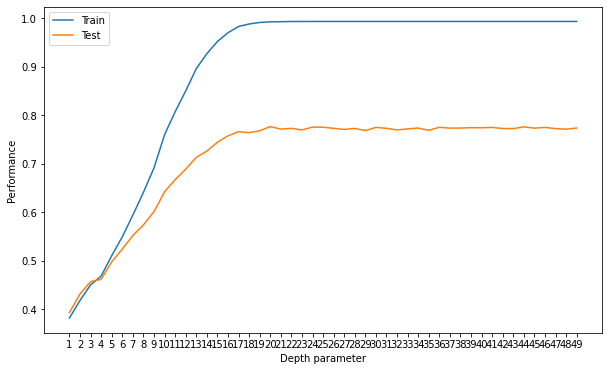

In [34]:
# Plot of test and training errors
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(range(1,50),train_errors, label='Train')
plt.plot(range(1,50),test_errors, label='Test')
plt.legend(loc='upper left')
plt.xlabel('Depth parameter')
plt.ylabel('Performance')
plt.xticks(ticks =np.arange(1, 50, 1));

In [35]:
tuned_rf= RandomForestClassifier(max_depth=20, class_weight = 'balanced')
tuned_rf.fit(Xa_train,ya_train)

tuned_rf_pred= tuned_rf.predict(Xa_test)

print(accuracy_score(ya_test, tuned_rf_pred))

print(classification_report(ya_test, tuned_rf_pred, target_names=target_names))

0.7736760726710475
              precision    recall  f1-score   support

      Level0       0.94      0.98      0.96      1058
      Level1       0.80      0.86      0.83      1053
      Level2       0.69      0.71      0.70       993
      Level3       0.61      0.45      0.52      1020
      Level4       0.78      0.84      0.81      1050

    accuracy                           0.77      5174
   macro avg       0.76      0.77      0.76      5174
weighted avg       0.76      0.77      0.77      5174



#####**FEATURE IMPORTANCE**
Let's see if only using the top 7 feature importances can improve the accuracy of the model.**

In [36]:
importances = tuned_rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = df.columns[1:]

for f in range(Xa_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[sorted_indices[f]],importances[sorted_indices[f]]))

 1) TestDate                       0.149807
 2) Special_Education              0.147736
 3) SocioEconomically              0.125830
 4) OverallLevel                   0.119164
 5) DaysAttended                   0.112846
 6) Stu_deID                       0.088744
 7) School_deID                    0.041973
 8) ExpectedAttendanceDays         0.037482
 9) GradeLevel                     0.033695
10) TestDayName                    0.024755
11) StudentEthnicity               0.024096
12) Homeless                       0.023653
13) TestAge                        0.022127
14) DOB                            0.021773
15) StudentGender                  0.014843
16) OverallScore                   0.011474


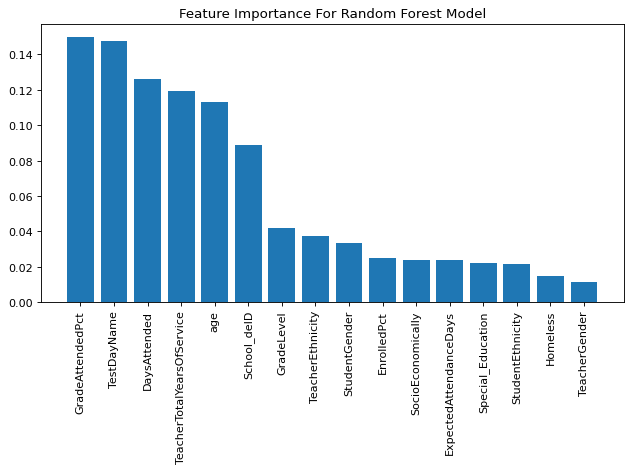

In [37]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title('Feature Importance For Random Forest Model')
plt.bar(range(Xa_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(Xa_train.shape[1]), Xa_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [38]:
#subset new dataset with only top 7 important features

imp_rf_train = Xa_train[['TestDayName', 'GradeAttendedPct','DaysAttended','TeacherTotalYearsOfService', 'age','School_deID']]
imp_rf_test = Xa_test[['TestDayName', 'GradeAttendedPct','DaysAttended','TeacherTotalYearsOfService', 'age','School_deID']]

In [39]:
target_names = ['Level0','Level1','Level2','Level3','Level4']

imp_rf= RandomForestClassifier(max_depth=20, class_weight = 'balanced')
imp_rf.fit(imp_rf_train,ya_train)
imp_rf_pred= imp_rf.predict(imp_rf_test)

print(accuracy_score(ya_test, imp_rf_pred))
print(classification_report(ya_test, imp_rf_pred, target_names=target_names))


0.760919984538075
              precision    recall  f1-score   support

      Level0       0.93      0.97      0.95      1058
      Level1       0.78      0.86      0.82      1053
      Level2       0.69      0.69      0.69       993
      Level3       0.59      0.44      0.50      1020
      Level4       0.75      0.82      0.79      1050

    accuracy                           0.76      5174
   macro avg       0.75      0.76      0.75      5174
weighted avg       0.75      0.76      0.75      5174



**The accuracy are similar to each other for the dataset with all features and dataset with only seven important features.**

**Using only 7 of the important features for LG model didn't improve the accuracy.**

##**BINNING THE TARGET CLASSES**

Binning the target classes to see if the accuracy improves. There will be 3 target classes: 

Level0  : Combination of level0 and level 1

Level1: : Combination of level2 and level 3

Level4  : Level 4 as a Final Pass

In [45]:
bin0_df = new_df[new_df['OverallLevel'] == 0]
bin1_df = new_df[new_df['OverallLevel'] == 1]
bin2_df = new_df[new_df['OverallLevel'] == 2]
bin3_df = new_df[new_df['OverallLevel'] == 3]
bin4_df = new_df[new_df['OverallLevel'] == 4]

In [46]:
bin_frames = (bin0_df, bin1_df, bin2_df, bin3_df)
bin_df = pd.concat(bin_frames)

#bin clases as Level 0 (combination of 0 and 1), Level 1 (combination of 2 and 3) and Level 4 as Final_Pass. 
bin_df['OverallLevel'] = bin_df['OverallLevel'].replace(to_replace = 1, value = 0) 
bin_df['OverallLevel'] = bin_df['OverallLevel'].replace(to_replace = 2, value = 1)
bin_df['OverallLevel'] = bin_df['OverallLevel'].replace(to_replace = 3, value = 1)

In [47]:
#split dataframes for downsampling
level0_df = bin_df[bin_df['OverallLevel'] == 0]
level1_df = bin_df[bin_df['OverallLevel'] == 1]

In [48]:
down_df01 = resample(level0_df,replace=True,n_samples=len(bin4_df),random_state=42)
down_df23 = resample(level1_df,replace=True,n_samples=len(bin4_df),random_state=42)

In [49]:
new_frames = (down_df01,down_df23,bin4_df)
bi_df = pd.concat(new_frames)

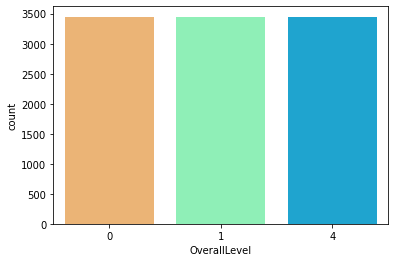

In [50]:
fig_szie=(12,8)
sns.countplot(bi_df['OverallLevel'], data = bi_df, palette = 'rainbow_r')

In [51]:
#Train test split for binned dataset
X = bi_df.loc[ : , bi_df.columns != 'OverallLevel']
y = bi_df[['OverallLevel']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7242, 16) (7242, 1) (3105, 16) (3105, 1)


In [52]:
##replace X value from StudentGender with Mode value for StudentGender column
X_train['StudentGender'] = X_train['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

X_test['StudentGender'] = X_test['StudentGender'].replace(to_replace = 'M', value = 'X') #replace X value with mode

#replace missing values from TestDayName column with mode value
X_train['TestDayName'] = X_train['TestDayName'].fillna(X_train['TestDayName'].mode()[0])
X_test['TestDayName'] = X_test['TestDayName'].fillna(X_test['TestDayName'].mode()[0])

#replace missing values from GradeAttendedPact with mean values
X_train['GradeAttendedPct'] = X_train['GradeAttendedPct'].fillna(X_train['GradeAttendedPct'].mean())
X_test['GradeAttendedPct'] = X_test['GradeAttendedPct'].fillna(X_test['GradeAttendedPct'].mean())

#label encoding 
#Train dataset
train_label_encoders = {}
for column in cat_columns:
  train_label_encoders[column] = LabelEncoder()
  X_train[column] = train_label_encoders[column].fit_transform(X_train[column])

#Test dataset
test_label_encoders = {}
for column in cat_columns:
  test_label_encoders[column] = LabelEncoder()
  X_test[column] = test_label_encoders[column].fit_transform(X_test[column])


###**MODELLING**

####**NAIVES BAYES**

In [53]:
target_names = ['Level0','Level1','Level4']

nb = MultinomialNB().fit(X_train, y_train)

bin_nb_pred = nb.predict(X_test)

print(accuracy_score(y_test, bin_nb_pred))
print(classification_report(y_test, bin_nb_pred, target_names=target_names))

0.4682769726247987
              precision    recall  f1-score   support

      Level0       0.51      0.60      0.55      1035
      Level1       0.40      0.24      0.30      1035
      Level4       0.46      0.56      0.51      1035

    accuracy                           0.47      3105
   macro avg       0.46      0.47      0.45      3105
weighted avg       0.46      0.47      0.45      3105



####**LOGISTIC REGRESSION**

In [59]:
from sklearn.linear_model import LogisticRegression

target_names = ['Level0', 'Level1','Level4']

lr_clf = LogisticRegression(random_state=0,  solver='newton-cg', 
                          multi_class='multinomial').fit(X_train, y_train)

bin_lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, bin_lr_pred))
print(classification_report(y_test, bin_lr_pred, target_names=target_names))

0.500805152979066
              precision    recall  f1-score   support

      Level0       0.56      0.66      0.60      1035
      Level1       0.43      0.18      0.26      1035
      Level4       0.48      0.66      0.55      1035

    accuracy                           0.50      3105
   macro avg       0.49      0.50      0.47      3105
weighted avg       0.49      0.50      0.47      3105



####**RANDOM FOREST**

In [54]:
bin_tuned_rf= RandomForestClassifier(max_depth=20, class_weight = 'balanced')
bin_tuned_rf.fit(X_train,y_train)

bin_rf_pred= bin_tuned_rf.predict(X_test)

print(accuracy_score(y_test, bin_rf_pred))

print(classification_report(y_test, bin_rf_pred, target_names=target_names))

0.8334943639291466
              precision    recall  f1-score   support

      Level0       0.89      0.88      0.89      1035
      Level1       0.82      0.72      0.77      1035
      Level4       0.80      0.89      0.84      1035

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [55]:
bin_importances = bin_tuned_rf.feature_importances_

# Sort the feature importance in descending order
bin_sorted_indices = np.argsort(bin_importances)[::-1]
feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[bin_sorted_indices[f]],bin_importances[sorted_indices[f]]))

 1) TestDate                       0.150799
 2) DaysAttended                   0.120871
 3) SocioEconomically              0.125016
 4) OverallLevel                   0.123257
 5) Special_Education              0.125438
 6) Stu_deID                       0.091004
 7) School_deID                    0.044332
 8) ExpectedAttendanceDays         0.039542
 9) GradeLevel                     0.032102
10) Homeless                       0.023353
11) TestAge                        0.023762
12) StudentEthnicity               0.025956
13) TestDayName                    0.025122
14) DOB                            0.023340
15) StudentGender                  0.014712
16) OverallScore                   0.011394


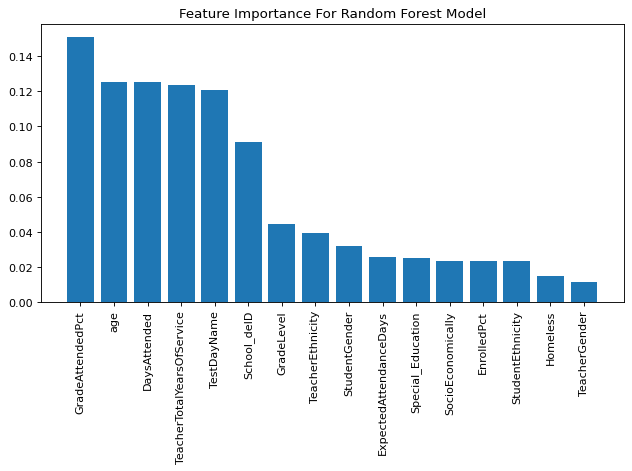

In [56]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.title('Feature Importance For Random Forest Model')
plt.bar(range(Xa_train.shape[1]), bin_importances[bin_sorted_indices], align='center')
plt.xticks(range(Xa_train.shape[1]), Xa_train.columns[bin_sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [57]:
#subset new dataset with only top 7 important features

bin_rf_train = Xa_train[['GradeAttendedPct','age','DaysAttended','TeacherTotalYearsOfService','TestDayName','School_deID','GradeLevel']]
bin_rf_test = Xa_test[['GradeAttendedPct','age','DaysAttended','TeacherTotalYearsOfService','TestDayName','School_deID','GradeLevel']]


In [58]:
target_names = ['Level0','Level1','Level2','Level3','Level4']

bin_rf= RandomForestClassifier(max_depth=20, class_weight = 'balanced')
bin_rf.fit(bin_rf_train,ya_train)
bin_rf_pred= bin_rf.predict(bin_rf_test)

print(accuracy_score(ya_test, bin_rf_pred))
print(classification_report(ya_test, bin_rf_pred, target_names=target_names))


0.7595670660997295
              precision    recall  f1-score   support

      Level0       0.93      0.98      0.95      1058
      Level1       0.78      0.85      0.81      1053
      Level2       0.69      0.70      0.69       993
      Level3       0.58      0.42      0.49      1020
      Level4       0.76      0.83      0.79      1050

    accuracy                           0.76      5174
   macro avg       0.75      0.76      0.75      5174
weighted avg       0.75      0.76      0.75      5174

